In [2]:
import numpy as np
import pandas as pd
import pickle
import csv
import matplotlib.pyplot as plt
from scipy import stats
import math
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from numpy import linspace, meshgrid

In [3]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def removeOutliers_Idx(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)   
    Idx = np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))
    return(Idx)
    
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

def studentT_test(first_var, second_var):
    n_1 = len(first_var)
    mean_1 = np.mean(first_var)
    var_1 = np.var(first_var)
    
    n_2 = len(second_var)
    mean_2 = np.mean(second_var)
    var_2 = np.var(second_var)
    
    d_f = min(n_1 - 1, n_2 - 1)
    
    t_test = (mean_1 - mean_2) /math.sqrt(var_1/n_1 + var_2/n_2) 
    p_value = 1 - stats.t.cdf(t_test, d_f)
    
    return(t_test, p_value, n_1, n_2)

stl = pd.read_csv("STL.csv")
ets = pd.read_csv("ets.csv")
auto = pd.read_csv("autoTemp.csv")
NN = pd.read_csv("NN.csv")

In [14]:
lat = np.load('lat.npy')
lon = np.load('lon.npy')

lat_number = deg.shape[0]
lon_number = deg.shape[1]

In [9]:
Idx = removeOutliers_Idx(NN.meanError,1.5)[0]
NN = NN.iloc[Idx,:]

Idx = removeOutliers_Idx(stl.meanError,1.5)[0]
stl = stl.iloc[Idx,:]

Idx = removeOutliers_Idx(ets.meanError,1.5)[0]
ets = ets.iloc[Idx,:]

Idx = removeOutliers_Idx(auto.meanError,1.5)[0]
auto = auto.iloc[Idx,:]

Text(0.5,1,'Errors for Exponential Smoothing')

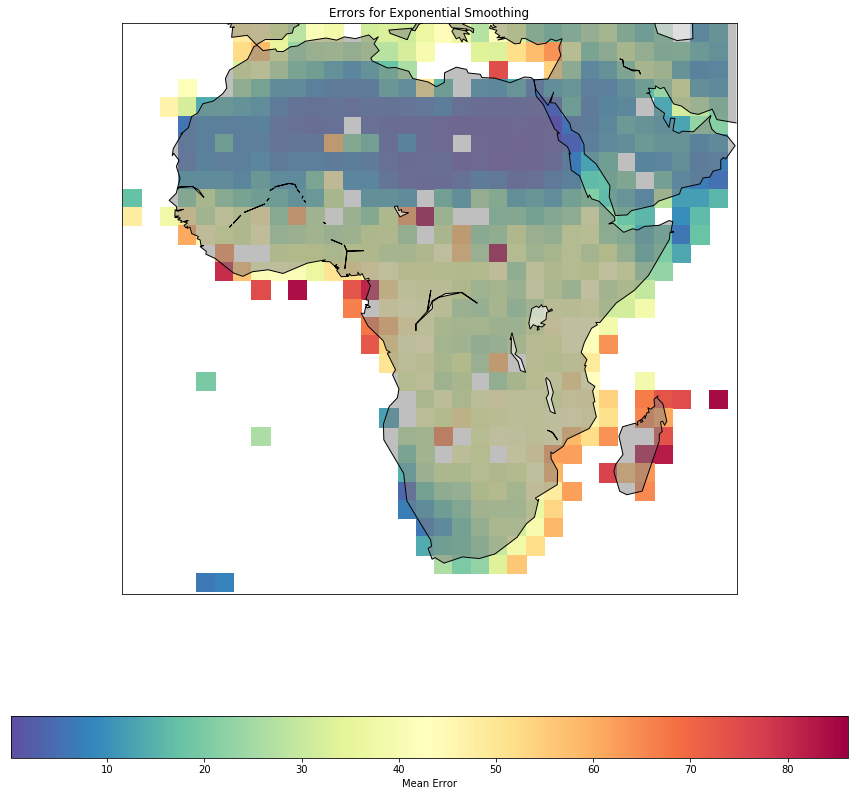

In [17]:
deg = np.zeros((len(lat),len(lon)))

for i in range(lat_number):
    for j in range(lon_number):
        if ets[(ets.lat == lat[i]) & (ets.lon == lon[j])].values.size != 0:
            deg[i,j] = ets[(ets.lat == lat[i]) & (ets.lon == lon[j])].meanError.values
        else:
            deg[i,j]=np.nan

lon1 = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon1, lat)
cs = m.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('Mean Error')
plt.title("Errors for Exponential Smoothing")

Text(0.5,1,'Errors for Exponential Smoothing + STL')

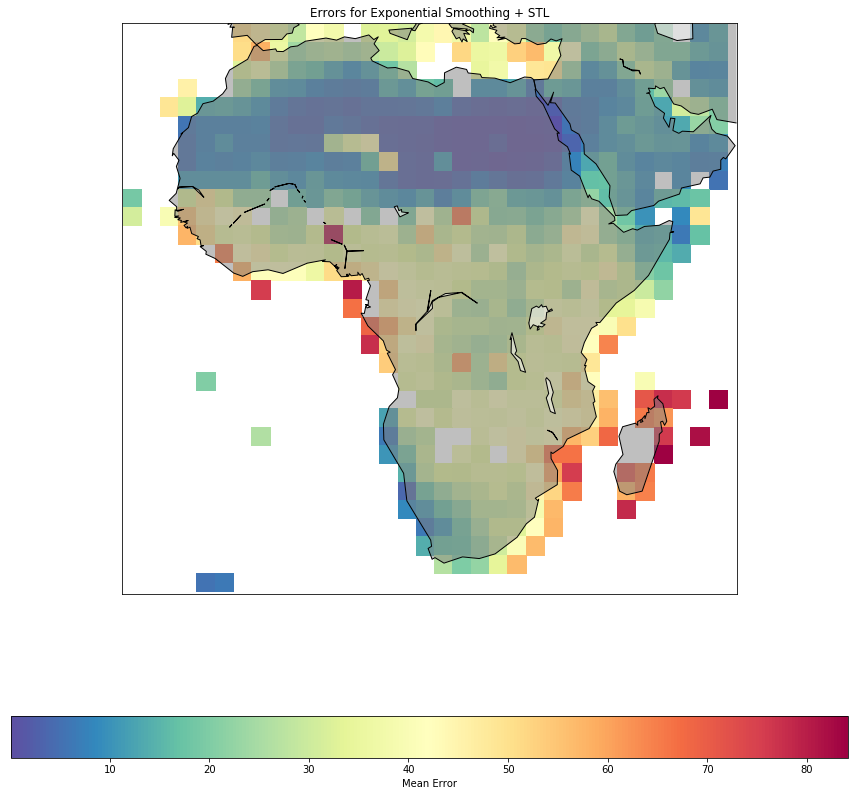

In [18]:
deg = np.zeros((len(lat),len(lon)))

for i in range(lat_number):
    for j in range(lon_number):
        if stl[(stl.lat == lat[i]) & (stl.lon == lon[j])].values.size != 0:
            deg[i,j] = stl[(stl.lat == lat[i]) & (stl.lon == lon[j])].meanError.values
        else:
            deg[i,j]=np.nan

lon1 = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon1, lat)
cs = m.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('Mean Error')
plt.title("Errors for Exponential Smoothing + STL")

Text(0.5,1,'Errors for Neural Network')

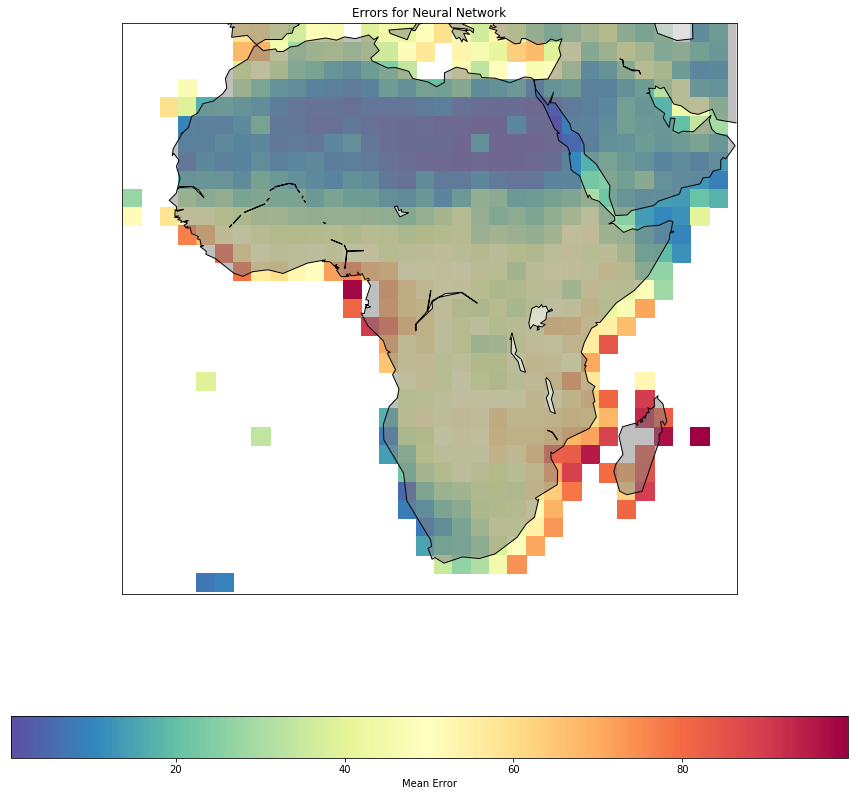

In [16]:
deg = np.zeros((len(lat),len(lon)))

for i in range(lat_number):
    for j in range(lon_number):
        if NN[(NN.lat == lat[i]) & (NN.lon == lon[j])].values.size != 0:
            deg[i,j] = NN[(NN.lat == lat[i]) & (NN.lon == lon[j])].meanError.values
        else:
            deg[i,j]=np.nan

lon1 = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon1, lat)
cs = m.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('Mean Error')
plt.title("Errors for Neural Network")

Text(0.5,1,'Errors for auto.arima')

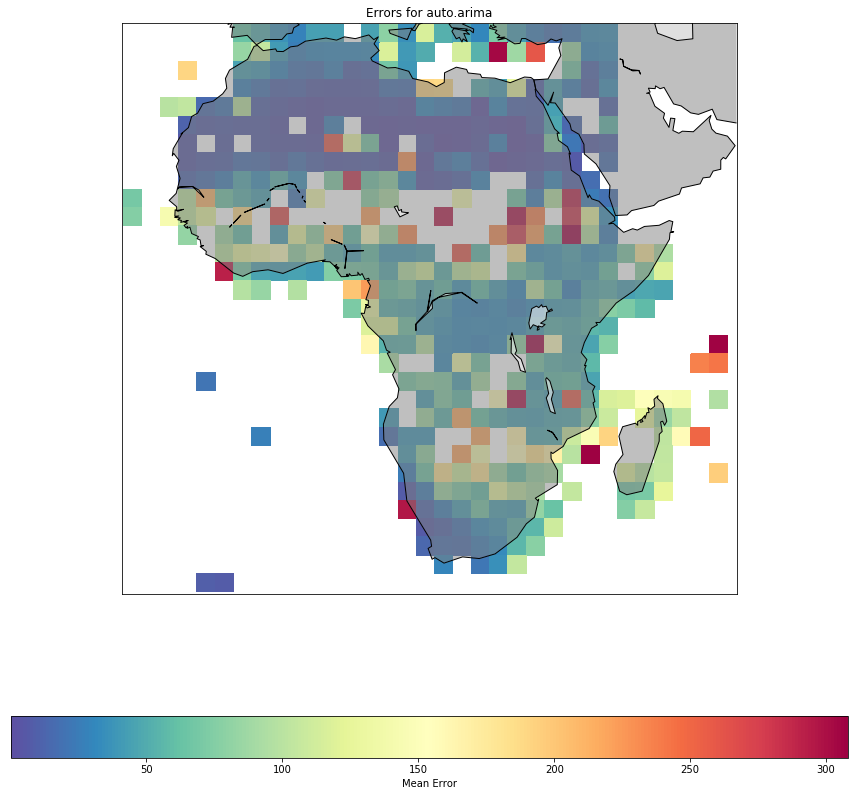

In [20]:
deg = np.zeros((len(lat),len(lon)))

for i in range(lat_number):
    for j in range(lon_number):
        if auto[(auto.lat == lat[i]) & (auto.lon == lon[j])].values.size != 0:
            deg[i,j] = auto[(auto.lat == lat[i]) & (auto.lon == lon[j])].meanError.values
        else:
            deg[i,j]=np.nan

lon1 = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon1, lat)
cs = m.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('Mean Error')
plt.title("Errors for auto.arima")